In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# 读取excel文件并获取指定列
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=['date', 'amount', 'order_cnt', 'refuelLiters', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week'], encoding='GBK')
print(df)

#1#  读取数据列

coloumName = 'refuelLiters'
data = df[coloumName]


           date  order_cnt       amount  refuelLiters text_day text_night  \
0      2023-1-1     902538  268544969.5   35358429.18        阴          阴   
1      2023-1-2    1066437  323796828.3   42657973.35        阴         多云   
2      2023-1-3    1216502  386938985.1   51190308.39       多云         多云   
3      2023-1-4     874633  271284119.0   35199415.35       多云         多云   
4      2023-1-5     901227  283022796.0   36791330.48       多云         多云   
..          ...        ...          ...           ...      ...        ...   
359  2023-12-26    1072045  335929197.6   44738960.24        阴         多云   
360  2023-12-27    1054896  332618128.4   44334481.65       多云          晴   
361  2023-12-28    1032115  323028612.7   42986493.14        晴         多云   
362  2023-12-29    1218840  372592734.2   49432247.01       多云         小雨   
363  2023-12-30    1126207  341635923.3   45312200.19        阴          晴   

     high  low wc_day wd_day wc_night wd_night week  
0       8    5    <3级

2024-05-28 11:44:15.729 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-05-28 11:44:15.734 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-05-28 11:44:15.911 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewnorm distribution with error=0.0)
2024-05-28 11:44:16.010 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-05-28 11:44:16.025 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=0.0)
2024-05-28 11:44:16.028 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,1.382153e-14,5247.379309,5259.070770,inf,0.159492,1.481965e-08
skewnorm,1.464030e-14,4308.813313,4320.504774,inf,0.088508,6.249189e-03
lognorm,1.563239e-14,4286.222799,4297.914260,inf,0.098890,1.498357e-03
norm,1.955997e-14,4387.258085,4395.052392,inf,0.113483,1.538651e-04
beta,5.280802e-14,3721.987023,3737.575638,inf,0.388253,6.545221e-50


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


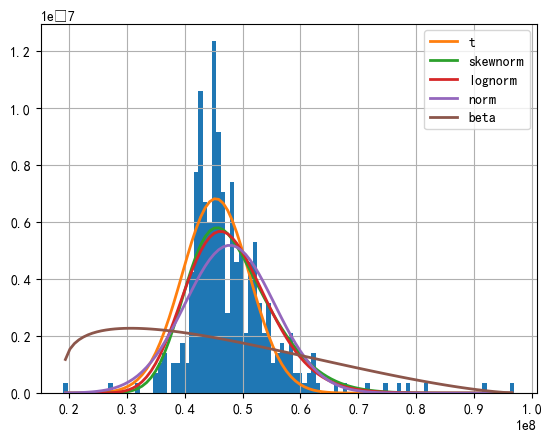

In [49]:
#2# 计算绘制参数

# 计算均值、标准差、中位数
mean = np.mean(data)
std = np.std(data)
median = np.median(data)

# 拟合多种分布
from fitter import Fitter
f = Fitter(data, distributions=['norm', 'skewnorm', 't', 'gamma', 'beta', 'lognorm'])
f.fit()
f.summary() #打印结果

最佳拟合分布名称: t
最佳拟合分布参数: {'df': 3698418676.939435, 'loc': 45377011.86628899, 'scale': 5841057.196182661}


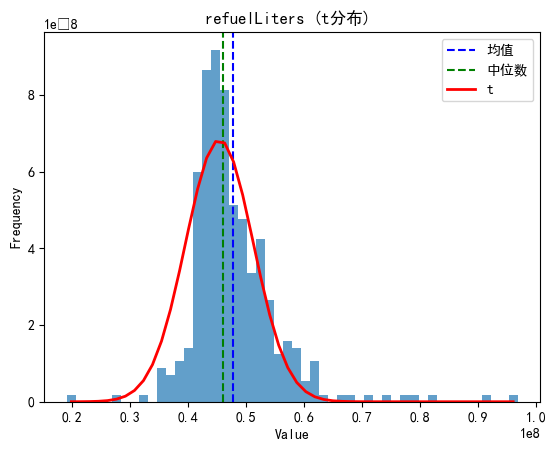

In [50]:
#3# 绘制直方图

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.axvline(mean, color='b', linestyle='--', label='均值') # 绘制均值线（红色线）
plt.axvline(median, color='g', linestyle='--', label='中位数') # 绘制中位数线（绿色线）
                                                                # 绘制众数线(不用画，看最高的直方柱即是)
plt.hist(data, bins=50, density=True, alpha=0.7) # 绘制直方图

# 获取最佳拟合分布的名称和参数
best_fit = f.get_best(method='sumsquare_error')
best_fit_name = list(best_fit.keys())[0]
best_fit_params = best_fit[best_fit_name]
# 打印调试信息
print("最佳拟合分布名称:", best_fit_name)
print("最佳拟合分布参数:", best_fit_params)
      
from scipy.stats import norm, skewnorm, t, gamma, beta, lognorm

# 创建映射从分布名称到实际的分布对象
distribution_map = {
    'norm': norm,
    'skewnorm': skewnorm,
    't': t,
    'gamma': gamma,
    'beta': beta,
    'lognorm': lognorm
}
# 计算直方图相关参数
hist, bins = np.histogram(data, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 计算拟合曲线的值
bin_centers = (bins[1:] + bins[:-1]) / 2
dist = distribution_map[best_fit_name]
pdf_values = dist.pdf(bin_centers, **best_fit_params)

plt.plot(bin_centers, pdf_values, 'r-', lw=2, label=best_fit_name) # 绘制拟合曲线
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(coloumName+' ('+best_fit_name+'分布) ')
plt.legend()
plt.show()